# Evaluation Exam

### Theory Section

- Define the following terms:

    - Supervised learning: 
    
        This is a subset of machine learning where the training datasets are pre-labeled. These labels guide the algorithms in classifying data or predicting outcomes accurately. This method is particularly useful when the desired output is known, and the algorithm needs to learn the mapping from input to output.
    
    - Unsupervised learning:  

        Contrary to supervised learning, this approach involves working with datasets that are not pre-labeled. In this scenario, the algorithms autonomously identify hidden patterns or clusters within the data, without any human intervention. 
        
    - Classification:

        Classification is a task that involves predicting the label or class of a given unlabeled data point. Formally speaking, a classifier is a function $M$ that predicts the class label $\hat{y}$ for a given input example $x$ in $\hat{y} = M(x)$, where $\hat{y} = \{c_1, c_1,...,c_k\}$ (each $c_i$ is a categorical attribute value). 
        
        As a form of supervised learning, this approach requires a training process where the model is exposed to training set, which includes data points already assigned with correct class labels. Through this training, the model learns to identify and categorize these points. Once the training is complete, the model is capable of automatically predicting the class for any new, unlabeled data point

    - Regression:

        Given a set of variables $X_1, X_2, ..., X_d$, called the predictor or independent variables, and given a variable $Y$ where $Y \in \mathbb{R}$, called the response or dependent variable, the goal of the regression is to predict the response variable based on the independent variables. In general:

        $Y = f(X_1, X_2, ..., X_d) + \epsilon = f(\textbf{X}) + \epsilon$

        Where $\textbf{X}$ is the multivariate random variable, and $\epsilon$ is a random error. Also, depending on the type of regression model (linear, logistic, etc.), the data used in these models need to adhere to certain statistical assumptions.

    - Clustering:

        Formally speaking, given a dataset $\textbf{D}$ with $n$ points $\textbf{x}_i$, and given the number of $k$ clusters, the goal of clustering is to partition the dataset into $k$ groups without using any kind of pre-labeled points, which differentiates it from classification tasks. The clusters are denoted by $C = \{C_1, C_2,..., C_k\}$ and, for each $C_i$, there exists a representative point defined as the mean or centroid $\mu_i$:

        $\mu_i = \frac{1}{n_i} \sum_{x_j \in C_i} \textbf{x}_j$

    - Dimensionality reduction: 
    
        Dimensionality reduction involves transforming data from a high-dimensional space into a lower-dimensional space, aiming to retain the most meaningful properties of the original dataset. Formally speaking, the goal of dimensionality reduction is to find an $r$-dimensional basis that aproximates $\textbf{x}'_i$ over all the points of $\textbf{x}_i \in \textbf{D}$ while minimizing the error $\epsilon_i = \textbf{x}_i - \textbf{x}_i'$.

- Explain the bias-variance tradeoff in machine learning.

    This concept describes the relationship between a model's complexity and the accuracy of its predictions. Generally, increasing the number of parameters in a model can lead to a better fit on the training set, thereby reducing bias. However, the trade-off is that such models often exhibit higher variance. In other words, when exposed to different sets of samples, these more complex models are likely to produce varying results.

- Describe the steps involved in the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology.

    - Business Understanding: Define the project objectives and requirements from a business perspective.
    - Data Understanding: Collect and familiarize with the data, identifying quality issues and initial insights.
    - Data Preparation: Clean and preprocess the data to create a final dataset for modeling.
    - Modeling: Select and apply various modeling techniques, tuning them to optimal parameters.
    - Evaluation: Assess the model against the business objectives, ensuring it meets the required goals.
    - Deployment: Implement the data mining solution, plan for its maintenance, and monitor its performance.

### Practical Section

- Business Case: You are working for a retail company, and they want to identify customer segments for targeted marketing campaigns. They have provided you with a dataset containing customer information such as age, gender, income, and purchase history. Your task is to perform customer segmentation using supervised learning techniques.

Steps to follow:

1. Which suitable supervised learning algorithm to cluster the customers would you choose? Give at least three options.
2. Choose the best and run it.
3. Analyze and interpret the results of the clustering.
4. Provide recommendations on how the company can utilize the customer segments for targeted marketing campaigns.




### Exploratory Data Analysis

1. To propose three suitable supervised learning algorithms, we should first conduct an exploratory data analysis to uncover meaningful insights that could inform our choice of the most appropriate model.

In [1]:
# Library for data manipulation
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv("data.csv", index_col="customer_id")

In [3]:
df.head()

,age,gender,income,purchase_history
customer_id,,,,
1,35,male,50000,low
2,28,female,40000,high
3,42,male,60000,medium
4,31,female,55000,low
5,37,female,65000,medium


Since the data has already been cleaned, further improvements are not required at this stage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               100 non-null    int64 
 1   gender            100 non-null    object
 2   income            100 non-null    int64 
 3   purchase_history  100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.9+ KB


According to the description, there is no target variable since this is a clustering task, suggesting that all columns are features. However, the dataset contains mixed types of data: categorical (`gender and` and `purchase_history`) and numerical (`age` and `income`), with the latter being continuous variables.

In [5]:
df.shape

(100, 4)

The dataset contains at least 100 samples but fewer than 10,000, indicating the need for an algorithm that is effective with smaller datasets

In [53]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

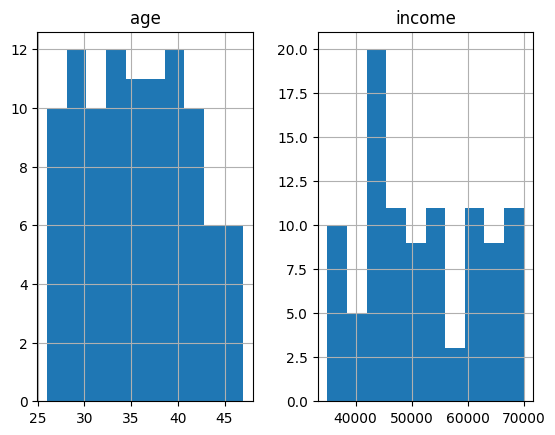

In [7]:
# Create histogram for each categorical column in DataFrame
numerical_columns = df.select_dtypes(include=['int64']).columns
df[numerical_columns].hist()

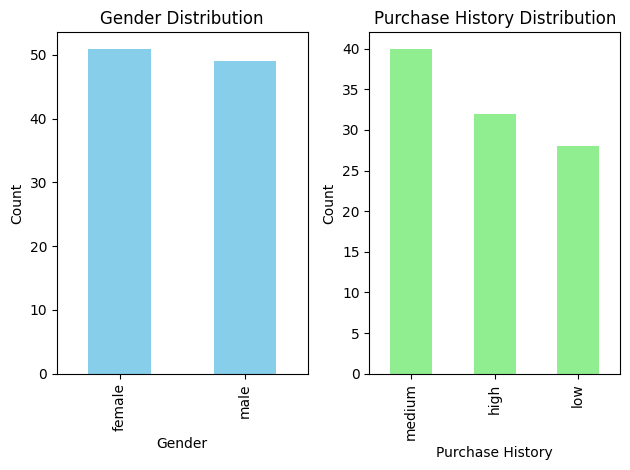

In [8]:
# Plot for 'gender' value counts
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
df['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot for 'purchase_history' value counts
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
df['purchase_history'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Purchase History Distribution')
plt.xlabel('Purchase History')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

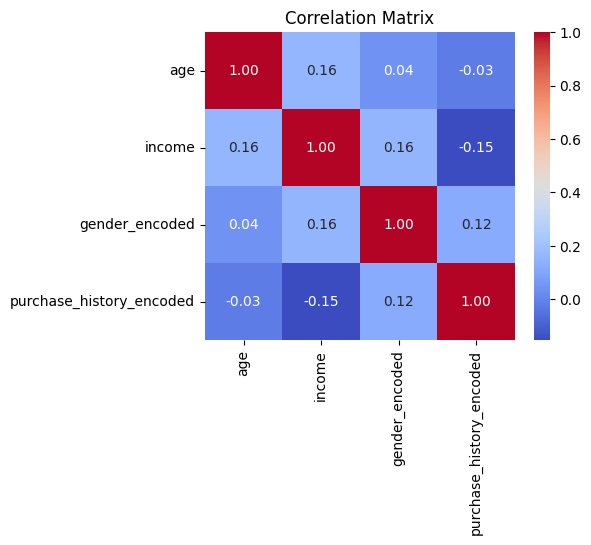

In [9]:
# Encoding categorical data
df['gender_encoded'] = LabelEncoder().fit_transform(df['gender'])
df['purchase_history_encoded'] = LabelEncoder().fit_transform(df['purchase_history'])

# Selecting numerical columns for the correlation matrix
numerical_data = df[['age', 'income', 'gender_encoded', 'purchase_history_encoded']]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Key Observations:

- The chosen algorithm must be capable of effectively handling datasets with a small number of samples (fewer or equal to 100).
- The dataset comprises a mix of categorical and numerical data types.
- The gender distribution within the dataset is notably balanced, with nearly equal numbers of female and male participants.
- We don't previously know the number of categories.
- There is no significant correlation among the variables, which likely indicates the absence of collinearity as well.

Some algorithms that could be used are:

- KMeans
- KModes
- K-Prototype
- MeanShift
- VBGMM
- MiniBatch KMeans

However, in this case, the most suitable algorithm for our problem is the K-Prototype algorithm. This method is an improvement of both the K-Means and K-Modes clustering algorithms, designed to handle mixed data types. The only downside is that we need to pre-determine the optimal number of categories to assign, but we can use the Elbow Method to handle this.

### K-Prototype implementation

In [10]:
from kmodes.kprototypes import KPrototypes

In [40]:
# Generate intervals for the age
classes = df['age'].value_counts(bins = 3, sort = False)
classes.index

IntervalIndex([(25.977999999999998, 33.0], (33.0, 40.0], (40.0, 47.0]], dtype='interval[float64, right]', name='age')

In [41]:
# Convert age to bins
df['age_bins'] = pd.cut(df['age'], bins=(25,33,40,47), labels=["26-33","34-40","40+"])
df[['age','age_bins']].drop_duplicates(subset=['age_bins']).reset_index(drop=True)

,age,age_bins
0,35,34-40
1,28,26-33
2,42,40+


In [42]:
features = df[['income', 'gender', 'age_bins', 'purchase_history']].reset_index(drop=True)

In [43]:
# Get the position of categorical columns
categorical_colums_index = [features.columns.get_loc(col) for col in list(features.select_dtypes(include=['object', 'category']).columns)]

print('Categorical columns           : {}'.format(list(df.select_dtypes(include=['object', 'category']).columns)))
print('Categorical columns position  : {}'.format(categorical_colums_index))

Categorical columns           : ['gender', 'purchase_history', 'age_bins', 'income_bins']
Categorical columns position  : [1, 2, 3]


Text(0, 0.5, 'c')

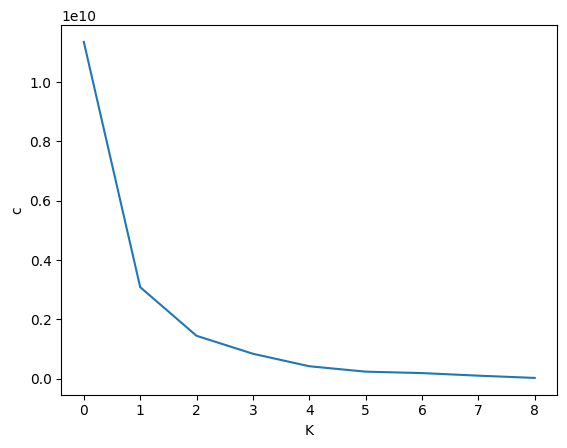

In [44]:
# Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(features, categorical = categorical_colums_index)
        cost.append(kprototype.cost_)
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('c')

In [54]:
# Library for the locator
from kneed import KneeLocator

In [45]:
# Cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
cost_knee_c3 = KneeLocator(
        x=range(1,10), 
        y=cost, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("Elbow at k =", f'{K_cost_c3:.0f} clusters')

Elbow at k = 3 clusters


2. Model run and results:

In [46]:
# Model run with k = 3
kproto_clusters = KPrototypes(n_clusters=3, init = 'Huang', random_state = 0)
result_cluster = kproto_clusters.fit_predict(features, categorical=categorical_colums_index)

In [55]:
features['Clusters'] = result_cluster
features.head()

,income,gender,age_bins,purchase_history,Clusters
0,50000,male,34-40,low,1
1,40000,female,26-33,high,0
2,60000,male,40+,medium,2
3,55000,female,26-33,low,1
4,65000,female,34-40,medium,2


<Axes: xlabel='Clusters'>

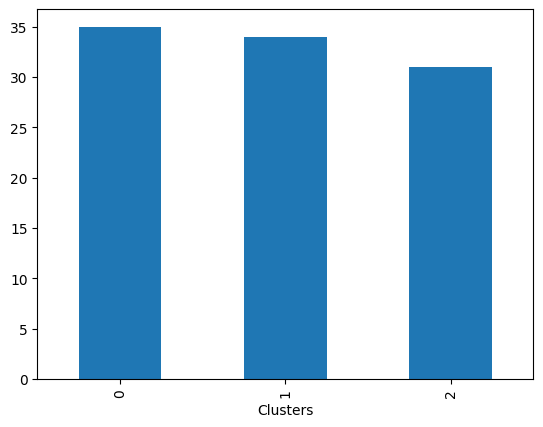

In [48]:
# The volume of each cluster
features['Clusters'].value_counts().plot(kind='bar')

In [56]:
# Mode of each feature grouped by clusters 
features.groupby(['Clusters']).agg(lambda x: pd.Series.mode(x).iat[0])[['income', 'gender', 'age_bins', 'purchase_history']]

,income,gender,age_bins,purchase_history
Clusters,,,,
0,42000,female,26-33,medium
1,48000,female,34-40,medium
2,60000,male,34-40,high


In [57]:
# Mean of the income feature grouped by clusters
features.groupby(['Clusters'])['income'].mean().round(2)

Clusters
0    40485.71
1    52147.06
2    65032.26
Name: income, dtype: float64

3. Key insights of the results:

- Cluster 0: Comprises predominantly younger individuals, characterized by lower average income and purchase history, with a majority being female.
- Cluster 1: Also composed mainly of females, this cluster falls into a slightly higher age bracket of 34-40 years old, with an average income of $48,000, and a similar medium purchase history. 
- Cluster 2: This segment is made up of males in the age range of 34-40, with a higher average income of $60,000, and a high purchase history. 
- Clusters 1 and 2 consist of individuals within the same age range. However, they differ in terms of average income and gender composition; the cluster with a predominantly male demographic exhibits a higher average income.
- While a higher income generally suggests a more extensive purchase history, this requires further analysis for confirmation. A statistical method such as ANOVA could be appropriate to investigate these relationships in more depth.

### Recommendations

4. Some general recommendations for targeted marketing campaigns:

- Clusters 1 and 2:
    - Age-Based Marketing: Since both clusters fall within the same age range, consider marketing campaigns that feature products or services relevant to mid-life milestones.
    - Gender-Specific Approaches: Develop marketing materials that cater to the predominantly female group of Cluster 1 and the male group of Cluster 2.

- Cluster 0:
    - Marketing Channels: Leverage social media platforms that are popular among younger demographics.

- Further Analysis:
    - Income vs. Purchase History Analysis: Conduct an ANOVA test or similar statistical analyses to better understand the correlation between income levels and purchase history.
    - Segment Deep Dive: Perform a deeper analysis of the clusters to identify sub-segments or niche markets within each cluster, which could reveal more targeted opportunities.